## **Classificação de imagens de cães e gatos utilizando CNN e Transfer Learning**

#### **Descrição sucinta do Desafio**

O projeto de Transfer Learning em Python consiste em aplicar o método de Transfer Learning em uma rede de Deep Learning na linguagem Python no ambiente COLAB.

#### **Detalhes do Desafio**
- Para exemplo, utilizaremos o seguinte projeto que realiza Transfer Learning com o Dataset do MNIST: https://colab.research.google.com/github/kylemath/ml4a-guides/blob/master/notebooks/transfer-learning.ipynb 

- O dataset utilizado engloba duas classes: gatos e cachorros. Uma descrição da base de dados pode ser visualizada neste link: https://www.tensorflow.org/datasets/catalog/cats_vs_dogs. 
>
- Já o dataset para download pode ser acessado por meio deste outro link: https://www.microsoft.com/en-us/download/details.aspx?id=54765. 
>
- **Observações:** Neste projeto, você pode usar sua própria base de dados (exemplo: fotos suas, dos seus pais, dos seus amigos, dos seus animais domésticos, etc), o exemplo de gatos e cachorros, pode ser substituído por duas outras classes do seu interesse. O Dataset criado em nosso projeto anterior, pode ser utilizado agora. 

#### **Projeto**
#### **Objetivo geral**
A partir do desafio proposto, a ideia deste projeto é treinar um modelo CNN para classificar se as imagens utilizadas correspondem a um cachorro ou gato.
> 
#### **Objetivos específicos**
- Desenvolver uma rede neural convolucional (CNN) para classificar fotos de cães e gatos;
- Carregar e preparar fotos de cães e gatos para modelagem;
- Desenvolver uma rede neural convolucional para classificação de fotos do zero e melhorar o desempenho do modelo;
- Desenvolver um modelo para classificação de fotos usando aprendizado de transferência (Transfer Learning).

## **Importando as Bibliotecas iniciais**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns

'''setting seed'''
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

## **Montando o Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Carregamento e extração das imagens**

In [3]:
import zipfile

zip_files = ['test1', 'train']

for zip_file in zip_files:
    with zipfile.ZipFile("/content/drive/MyDrive/Kaggle/dogs-vs-cats/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))
TRAIN_DIR_PATH = './train'
file_names = os.listdir(TRAIN_DIR_PATH)
print('There are {} number of images in directory.'.format(len(file_names)))

test1 unzipped
train unzipped
There are 25000 number of images in directory.


In [4]:
def to_dataframe(file_names):
    files, labels = list(), list()
    for file in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'nome_do_arquivo':files, 'animal':labels})
    return df

df = to_dataframe(file_names)
df.head()

,nome_do_arquivo,animal
0,dog.5505.jpg,dog
1,cat.7834.jpg,cat
2,cat.4256.jpg,cat
3,dog.9541.jpg,dog
4,cat.4732.jpg,cat


## **Breve análise das imagens**

Distribuição do conjunto de dados:
 dog    12500
cat    12500
Name: animal, dtype: int64


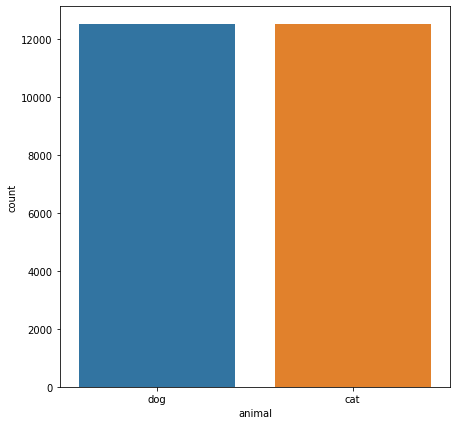

In [5]:
print('Distribuição do conjunto de dados:\n',df['animal'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(x = df['animal'])
plt.show()

In [6]:
cat = [file for file in file_names if file[:3]=='cat']
dog = [file for file in file_names if file[:3]=='dog']

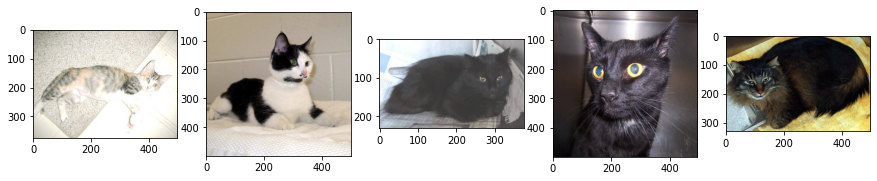

In [7]:
plt.figure(figsize=(15,7))
for i, c in enumerate(np.random.randint(0,len(cat),5), start=1):
    im = img.imread('./train/'+cat[c])
    plt.subplot(2,5,i)
    plt.imshow(im)

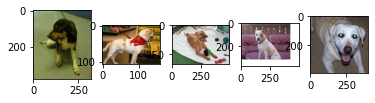

In [8]:
for i, c in enumerate(np.random.randint(0,len(dog),5), start=6):
    im = img.imread('./train/'+dog[c])
    plt.subplot(2,5,i)
    plt.imshow(im)

Observando algumas fotos aleatórias no diretório. Veja que as fotos são coloridas e têm formas e tamanhos diferentes.

## **Dividindo os dados em treinamento e teste**

In [9]:
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(df, test_size=0.2,random_state=seed)

In [10]:
train_set.shape, valid_set.shape

((20000, 2), (5000, 2))

In [11]:
print('Distribuição dos dados de treino:\n',train_set['animal'].value_counts())
print('\nDistribuição válida:\n',valid_set['animal'].value_counts())
print()

Distribuição dos dados de treino:
 cat    10052
dog     9948
Name: animal, dtype: int64

Distribuição válida:
 dog    2552
cat    2448
Name: animal, dtype: int64



Text(0.5, 1.0, 'Distribuição dos dados de treino')

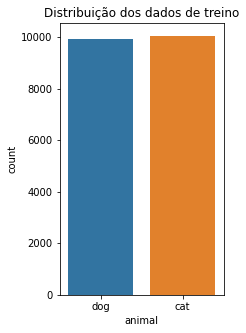

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.countplot(x=train_set['animal'], order=['dog','cat'])
plt.title('Distribuição dos dados de treino')

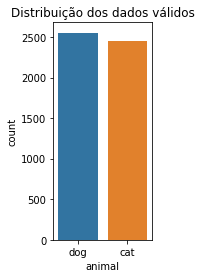

In [13]:
plt.subplot(1,3,3)
sns.countplot(x=valid_set['animal'], order=['dog','cat'])
plt.title('Distribuição dos dados válidos')
plt.show()

## **Image Data Generator e Data Augmentation**

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

WIDTH, HEIGHT = 150, 150
batch_size = 32
train_datagenerator = ImageDataGenerator(rotation_range=15, 
                                  rescale=1./255, 
                                  shear_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1)

training_data = train_datagenerator.flow_from_dataframe(dataframe=train_set, 
                                                        directory='./train',
                                                       x_col='nome_do_arquivo',
                                                       y_col='animal',
                                                       target_size=(WIDTH, HEIGHT),
                                                       class_mode='categorical',
                                                       batch_size=batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [15]:
valid_datagenerator = ImageDataGenerator(rescale=1./255)
validation_data = valid_datagenerator.flow_from_dataframe(dataframe=valid_set,
                                                         directory='./train',
                                                         x_col='nome_do_arquivo',
                                                         y_col='animal',
                                                         target_size=(WIDTH,HEIGHT),
                                                         class_mode='categorical',
                                                         batch_size=batch_size)

Found 5000 validated image filenames belonging to 2 classes.


## **Construindo um modelo CNN**

In [16]:
from tensorflow.keras.layers import *
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential()

model.add(DefaultConv2D(filters=32, kernel_size=5, input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=64))
model.add(DefaultConv2D(filters=64))
model.add(MaxPooling2D(pool_size=2))

model.add(DefaultConv2D(filters=128))
model.add(DefaultConv2D(filters=128))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 37, 37, 128)       7

## **Callbacks**

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = ReduceLROnPlateau(factor=0.5, patience=5, monitor='val_loss', min_lr=0.00001)
checkpoint_cb = ModelCheckpoint('model.h5', save_best_only=True)

callbacks = [earlystop_cb, reduce_lr_cb, checkpoint_cb]

## **Treinando o modelo**

In [18]:
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])
history = model.fit(training_data,
                   epochs=50,
                   validation_data=validation_data,
                   validation_steps=valid_set.shape[0]//batch_size,
                   steps_per_epoch=train_set.shape[0]//batch_size, 
                   callbacks=callbacks)

'''
Epoch: um corte arbitrário, geralmente definido como "uma passagem por todo o conjunto de dados", 
usado para separar o treinamento em fases distintas, o que é útil para registro e avaliação periódica.
Então, em outras palavras, um número de épocas significa quantas vezes você passa pelo seu conjunto de treinamento.
'''

Epoch 1/50
625/625 [==============================] - 176s 265ms/step - loss: 0.6890 - accuracy: 0.5366 - val_loss: 0.6788 - val_accuracy: 0.5669 - lr: 0.0100
Epoch 2/50
625/625 [==============================] - 160s 256ms/step - loss: 0.6536 - accuracy: 0.6202 - val_loss: 0.6578 - val_accuracy: 0.5873 - lr: 0.0100
Epoch 3/50
625/625 [==============================] - 162s 259ms/step - loss: 0.6202 - accuracy: 0.6612 - val_loss: 0.5434 - val_accuracy: 0.7202 - lr: 0.0100
Epoch 4/50
625/625 [==============================] - 163s 260ms/step - loss: 0.5721 - accuracy: 0.7006 - val_loss: 0.4939 - val_accuracy: 0.7614 - lr: 0.0100
Epoch 5/50
625/625 [==============================] - 158s 252ms/step - loss: 0.5387 - accuracy: 0.7326 - val_loss: 0.4581 - val_accuracy: 0.7871 - lr: 0.0100
Epoch 6/50
625/625 [==============================] - 162s 260ms/step - loss: 0.5175 - accuracy: 0.7404 - val_loss: 0.4554 - val_accuracy: 0.7967 - lr: 0.0100
Epoch 7/50
625/625 [==========================

'\nEpoch: um corte arbitrário, geralmente definido como "uma passagem por todo o conjunto de dados", \nusado para separar o treinamento em fases distintas, o que é útil para registro e avaliação periódica.\nEntão, em outras palavras, um número de épocas significa quantas vezes você passa pelo seu conjunto de treinamento.\n'

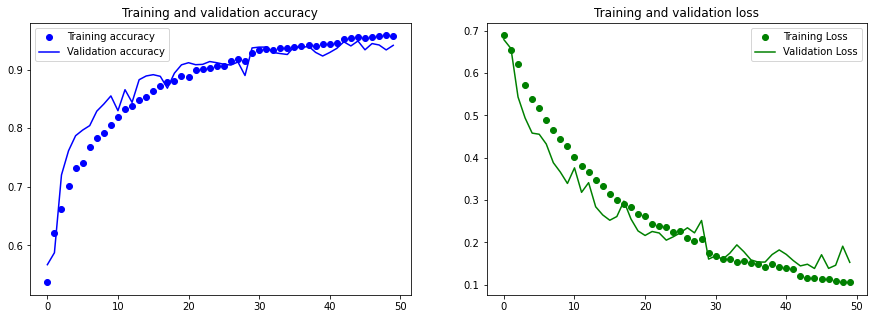

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## **Avaliação do Modelo**

In [20]:
model1 = keras.models.load_model('model.h5')

In [21]:
test_loss, test_acc = model1.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 [==============================] - 23s 145ms/step - loss: 0.1386 - accuracy: 0.9486
Loss: 0.139
Accuracy: 94.860


**A Arquitetura VGG funciona bem nos dados**

**Então no próximo vamos treinar a arquitetura VGG16 (aprendizagem de transferência)**

## **Transfer Learning**

In [22]:
base_model = keras.applications.vgg16.VGG16(weights="imagenet", include_top=False, input_shape=(WIDTH,HEIGHT,3))
base_model.trainable = False ## Not trainable weights

58889256/58889256 [==============================] - 3s 0us/step


In [23]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [24]:
from tensorflow.keras.layers import *

model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_data,
            epochs=4,
            validation_data=validation_data,
            validation_steps=valid_set.shape[0]//batch_size,
            steps_per_epoch=train_set.shape[0]//batch_size, 
            )

Epoch 1/4
625/625 [==============================] - 167s 263ms/step - loss: 0.5257 - accuracy: 0.7302 - val_loss: 0.3275 - val_accuracy: 0.8910
Epoch 2/4
625/625 [==============================] - 168s 269ms/step - loss: 0.4816 - accuracy: 0.7779 - val_loss: 0.3646 - val_accuracy: 0.8688
Epoch 3/4
625/625 [==============================] - 164s 263ms/step - loss: 0.4688 - accuracy: 0.7890 - val_loss: 0.4015 - val_accuracy: 0.8321
Epoch 4/4
625/625 [==============================] - 165s 264ms/step - loss: 0.4558 - accuracy: 0.7923 - val_loss: 0.3243 - val_accuracy: 0.8886


In [25]:
model.layers[0].trainable=True

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               1048704   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 15,763,650
Trainable params: 15,763,650
Non-trainable params: 0
_________________________________________________________________


In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('model1.h5',save_best_only=True)
earlystop_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data,
            epochs=20,
            validation_data=validation_data,
            validation_steps=valid_set.shape[0]//batch_size,
            steps_per_epoch=train_set.shape[0]//batch_size, 
            callbacks=[checkpoint_cb, earlystop_cb])

Epoch 1/20
625/625 [==============================] - 202s 318ms/step - loss: 0.3015 - accuracy: 0.8709 - val_loss: 0.0904 - val_accuracy: 0.9688
Epoch 2/20
625/625 [==============================] - 199s 318ms/step - loss: 0.1259 - accuracy: 0.9504 - val_loss: 0.0694 - val_accuracy: 0.9722
Epoch 3/20
625/625 [==============================] - 193s 309ms/step - loss: 0.0887 - accuracy: 0.9658 - val_loss: 0.0801 - val_accuracy: 0.9700
Epoch 4/20
625/625 [==============================] - 199s 319ms/step - loss: 0.0729 - accuracy: 0.9730 - val_loss: 0.0729 - val_accuracy: 0.9685
Epoch 5/20
625/625 [==============================] - 197s 315ms/step - loss: 0.0665 - accuracy: 0.9742 - val_loss: 0.0613 - val_accuracy: 0.9778
Epoch 6/20
625/625 [==============================] - 192s 307ms/step - loss: 0.0618 - accuracy: 0.9758 - val_loss: 0.0905 - val_accuracy: 0.9692
Epoch 7/20
625/625 [==============================] - 197s 315ms/step - loss: 0.0483 - accuracy: 0.9819 - val_loss: 0.0439 -

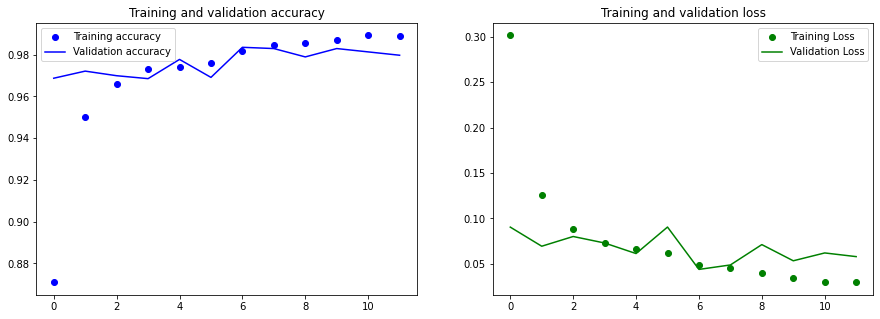

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [29]:
model2 = keras.models.load_model('model1.h5')

In [30]:
test_loss, test_acc = model2.evaluate(validation_data, steps=len(validation_data), verbose=1)
print('Loss: %.3f' % (test_loss))
print('Accuracy: %.3f' % (test_acc * 100.0))

157/157 [==============================] - 18s 110ms/step - loss: 0.0438 - accuracy: 0.9836
Loss: 0.044
Accuracy: 98.360


**Nada melhor....**

## **Fazendo previsões**

In [31]:
sampleSubmission = pd.read_csv('/content/drive/MyDrive/Kaggle/dogs-vs-cats/sampleSubmission.csv')
test_df = sampleSubmission.copy()
test_df['id'] = test_df['id'].apply(lambda x : str(x)+'.jpg')
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df, 
                                                "./test1/", 
                                                x_col='id',
                                                y_col=None,
                                                class_mode=None,
                                                target_size=(WIDTH,HEIGHT),
                                                batch_size=batch_size,
                                                shuffle=False)

Found 12500 validated image filenames.


In [32]:
predict = model1.predict(test_generator, steps=np.ceil(test_df.shape[0]/batch_size))

sampleSubmission['label'] = np.argmax(predict, axis=-1)
sampleSubmission.to_csv('submission.csv', index=False)

test_df['label'] = sampleSubmission['label'].replace({ 1: 'dog', 0: 'cat' })

391/391 [==============================] - 36s 91ms/step


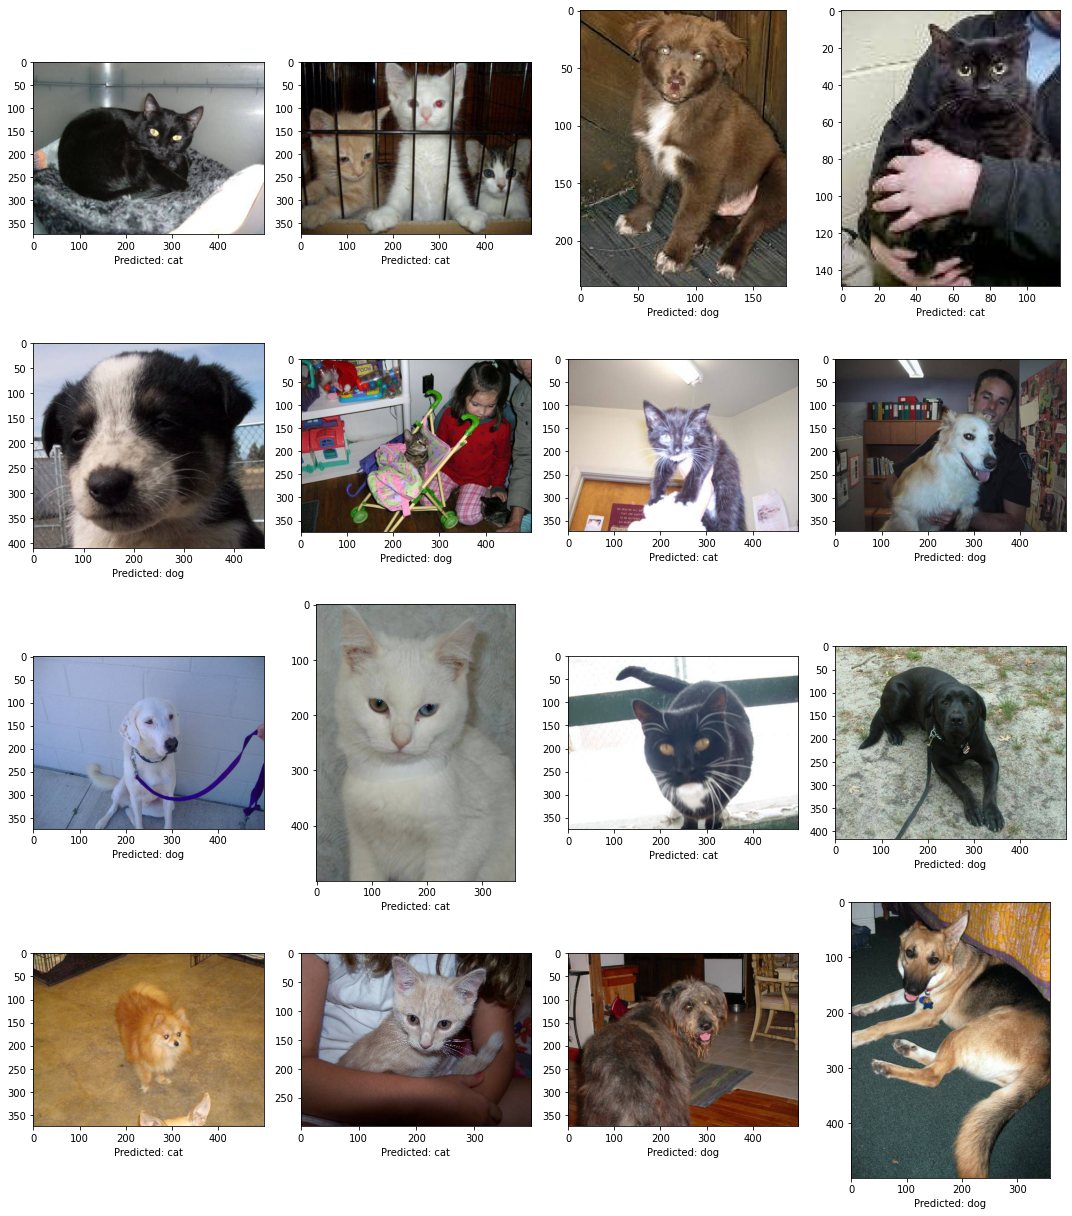

In [33]:
sample_test = test_df.values[np.random.randint(0, len(test_df), 16)]
sample_test
plt.figure(figsize=(15, 17))
for index, row in enumerate(sample_test):
    filename = row[0]
    category = row[1]
    image = img.imread("./test1/"+filename)
    plt.subplot(4, 4, index+1)
    plt.imshow(image)
    plt.xlabel('Predicted: ' + "{}".format(category) )
plt.tight_layout()
plt.show()